# Basic Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()

'/Users/abhinaydommalapati'

In [326]:
df = pd.read_csv('insurance_claims.csv')

# Peeking at the data

In [370]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,incident_state_count
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,248
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,110
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,262
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,23
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,NaN,262


In [371]:
df.shape

(1000, 41)

# Exploring the Data

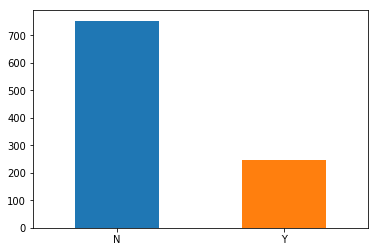

In [372]:
df['fraud_reported'].value_counts().plot(kind='bar', rot=1)

## So the target class is imbalanced. This makes the classification more difficult. We should try to avoid as many false positives as we can. Let's look more into the attributed for each class

In [436]:
yes = df[df['fraud_reported'] == 'Y']

In [437]:
no = df[df['fraud_reported'] == 'N']

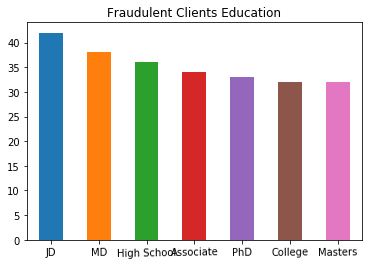

In [438]:
yes['insured_education_level'].value_counts().plot(kind='bar', title= 'Fraudulent Clients Education', x = 'Education', y = 'Count', rot=1)

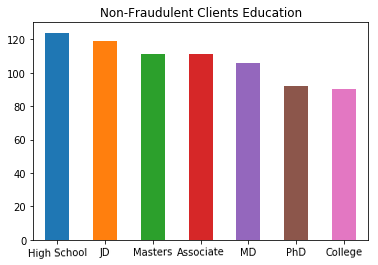

In [439]:
no['insured_education_level'].value_counts().plot(kind='bar', title='Non-Fraudulent Clients Education', x='Education', y='count', rot=1)

## Looking for a trend over time

In [379]:
data = [go.Bar(x=yesSortedYear['auto_year'], y=yesSortedYear['total_claim_amount'])]

layout = go.Layout(title = 'Auto Claim Amounts for the Past Two Decades', xaxis=dict(title='Year'), yaxis=dict(title='Total Claim Amount'))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'bar')

In [380]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [381]:
df['incident_state_count'] = df['incident_state']

In [383]:
for i in range(len(df['incident_state_count'])):
    if df.iloc[i, 40] == "NY":
        df.iloc[i, 40] = 262
    if df.iloc[i, 40] == "SC":
        df.iloc[i, 40] = 248
    if df.iloc[i, 40] == "WV":
        df.iloc[i, 40] = 217
    if df.iloc[i, 40] == "VA":
        df.iloc[i, 40] = 110
    if df.iloc[i, 40] == "NC":
        df.iloc[i, 40] = 110
    if df.iloc[i, 40] == "PA":
        df.iloc[i, 40] = 30
    if df.iloc[i, 40] == "OH":
        df.iloc[i, 40] = 23

## Looking for trends by location

In [384]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in(username='abhinaydomm', api_key='VNVRv2SmOnOaK6bVAeY9')

data = [go.Choropleth(autocolorscale = True, locations = df['incident_state'],
                      z = df['incident_state_count'],
                      locationmode = 'USA-states',
                      marker = go.choropleth.Marker(line = go.choropleth.marker.Line(color = 'rgb(255,255,255)', width = 2)),
                      colorbar = go.choropleth.ColorBar(title = "Number of Incidents"))]
layout = go.Layout(
    title = go.layout.Title(
        text = 'Insurance Incident Claims on the Mid-Atlantic'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

### Based on our data exploration, let's delete the columns that we don't want to work with because they're essentially useless for adding value to our predictive models

In [385]:
del df['policy_number']
del df['policy_bind_date']
del df['insured_zip']
del df['incident_location']
del df['incident_date']
del df['incident_state_count']

In [441]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [442]:
df.shape

(1000, 35)

# Preprocessing the data for our pipeline

In [451]:
Xdf = df.loc[:,'months_as_customer':'auto_year']

In [452]:
Ydf = df['fraud_reported']

In [453]:
Ydf = Ydf.replace("Y", 1)
Ydf = Ydf.replace("N", 0)

In [454]:
Ydf.dtypes

dtype('int64')

In [455]:
Xdf.shape

(1000, 33)

## Use get_dummies to convert categorical columns to numerical ones 

In [456]:
convDF = pd.get_dummies(Xdf)

In [457]:
convDF.shape

(1000, 161)

In [395]:
convDF.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0


### Do this to avoid those annoying warnings! Trust me! It helps!

In [458]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Writing our modularized code for randomized and grid search

In [459]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [460]:
def perform_randomized_search(features, target, model, hyperparams, kFolds):
  randomizedsearch = RandomizedSearchCV(model, hyperparams, cv = kFolds, verbose=1)
  best_model = randomizedsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

In [479]:
logistic = linear_model.LogisticRegression(class_weight = 'balanced')
penalty = ['l1', 'l2']
C = np.random.uniform(0, 10, 10000)
hyperparameters = dict(C=C, penalty=penalty)

In [480]:
perform_randomized_search(convDF, Ydf, logistic, hyperparameters, 10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The mean accuracy of the model is: 0.881
The best parameters for the model are: {'penalty': 'l1', 'C': 7.833154072944154}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


In [497]:
from sklearn.model_selection import GridSearchCV

def perform_gridsearch(features, target, model, hyperparams, kFolds):
  gridsearch = GridSearchCV(model, hyperparams, cv=kFolds, verbose=1)
  best_model = gridsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

In [482]:
penalty = ['l1', 'l2']
C = np.logspace(0, 10, 20)
hyperparameters = dict(C=C, penalty=penalty)

In [483]:
perform_gridsearch(convDF, Ydf, logistic, hyperparameters, 10)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
The mean accuracy of the model is: 0.872
The best parameters for the model are: {'C': 1.0, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.5s finished


### Not a bad accuracy for a first run! Now let's run this logistic regression on a train/test split so we can see a classification report

In [509]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(convDF, Ydf, test_size=0.2, random_state=30)

In [493]:
# Notice that we can simply copy the hyperparameters from our more efficient gridsearch 
# into our logistic regression object

logReg = linear_model.LogisticRegression(C=1.0, penalty='l1')

In [494]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [495]:
y_pred = logReg.predict(X_test)

In [496]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       154
          1       0.68      0.59      0.63        46

avg / total       0.83      0.84      0.84       200



## So we're able to predict the positives with a 0.68 accuracy. That's not bad considering the difficulty of predicting positives in an imbalanced binary classification problem. But we should be able to predict a higher accuracy of the negatives because they are easier to predict given their dominance in the dataset. 

## How do we do this? Compare different models. How do we do this? 

## Build a pipeline!

In [498]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## We will include our logistic regression models in addition to RandomForestClassifier and DecisionTreeClassifier

models = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear']
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__splitter":['best', 'random'],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                 {"classifier": [DecisionTreeClassifier(class_weight = 'balanced')],
                 "classifier__splitter":['best', 'random'],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},]

In [499]:
def execute_pipeline(features,target, model_list, kFolds):
  pipe = Pipeline([("classifier", RandomForestClassifier())])
  gridsearch = GridSearchCV(pipe, model_list, cv=kFolds, verbose=1, n_jobs=-1) # Fit grid search
  best_model = gridsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

## Execute our pipeline!

In [500]:
execute_pipeline(convDF, Ydf, models, 5)

Fitting 5 folds for each of 816 candidates, totalling 4080 fits


/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorith

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning:

The line search algorithm did not converge

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorith

/Users/abhinaydommalapati/Desktop/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning:

The line search algorithm did not converge

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 599 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1399 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  6.4min


The mean accuracy of the model is: 0.854
The best parameters for the model are: {'classifier': DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), 'classifier__max_depth': 5, 'classifier__max_leaf_nodes': 5, 'classifier__min_samples_leaf': 10, 'classifier__splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 4080 out of 4080 | elapsed:  6.5min finished


## This is interesting. Our pipeline spits our DecisonTree as the best model even though LogisticRegression seemed to be pretty accurate earlier. Let's look at DecisionTree on a train-split.

## But first, let's see why we didn't include SVC in our pipeline. Reason - it weirdly gives 100% accuracy. Eerie.

In [501]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', class_weight = 'balanced')

In [502]:
C = np.random.uniform(0, 10, 100)
hyperparameters = dict(C=C)

In [503]:
perform_gridsearch(convDF, Ydf, svm, hyperparameters, 5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.2min finished


The mean accuracy of the model is: 1.0
The best parameters for the model are: {'C': 9.252289152646746}


### This is why we didn't include SVC. It overfits the data like crazy.
### But let's run the DecisionTree algorithm on the train-test and see what our classification report looks like

In [508]:
decT = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [510]:
decT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [511]:
y_pred = decT.predict(X_test)

In [512]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.81      0.87       154
          1       0.57      0.85      0.68        46

avg / total       0.86      0.81      0.83       200

